<a href="https://colab.research.google.com/github/zhuohangu/LMCache-Examples/blob/main/tutorial_1_LMCache_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🧪 Running LMCache with vLLM on Google Colab**

This Colab notebook demonstrates how to run LMCache with the vLLM inference engine. We use Meta's Llama-3.1-8B-Instruct model as an example.


<p align="center">
  <a href="https://lmcache.ai/" style="display:inline-block; margin:0 1em; text-decoration:none;">
    <img
      src="https://raw.githubusercontent.com/LMCache/LMCache/2e4c7b95a0784babd6d61313724a801614898e1e/docs/source/assets/lmcache-logo_crop.png"
      alt="LMCache logo"
      width="170"
      style="vertical-align:middle; border:none;"
    />
  </a>
</p>

<p align="center" style="margin-top:.5em;">
  <a href="https://join.slack.com/t/lmcacheworkspace/shared_invite/zt-2viziwhue-5Amprc9k5hcIdXT7XevTaQ" style="text-decoration:none;">
    <img
      src="https://upload.wikimedia.org/wikipedia/commons/b/b9/Slack_Technologies_Logo.svg"
      alt="Slack logo"
      width="125"
      style="vertical-align:middle; margin-right: 0.5em;"
    />
  </a>
</p>

<!-- GitHub line -->
<p align="center">
  <em><b>Join Slack if you need help + ⭐ Star us on <a href="https://github.com/LMCache/LMCache" style="text-decoration:none;">GitHub</a> ⭐</b></em>
</p>



*The setup is designed to be compatible with the free GPU tier on Google Colab. You can follow along without requiring any paid compute resources.*

## ⚙️ Configure Colab Runtime

To enable GPU acceleration on Google Colab:

1. Click the **Runtime** menu in the top toolbar.
2. Select **Change runtime type**.
3. In the **Hardware accelerator** dropdown, choose **GPU** (preferably **A100 GPU**, as LMCache currently does not support the T4 GPU).
4. Click **Save**.

> 📌 You can confirm GPU access by running the following cell:
>
> ```python
> !nvidia-smi
> ```

---

## 🔐 Set Up Hugging Face Credentials

Since this demo uses **Meta’s Llama-3.1-8B-Instruct model**, you’ll need to set up your Hugging Face account and request access:

1. **Sign up** for a free account at [https://huggingface.co/join](https://huggingface.co/join).
2. **Request access** to the LLaMA 3 model here:  
   👉 [Llama-3.1-8B-Instruct Model Card](https://huggingface.co/meta-llama/Llama-3.1-8B-Instruct)  
3. Once approved, **create a Hugging Face access token**:  
   👉 [Token Settings Page](https://huggingface.co/settings/tokens)  
4. Click on the sidebar (left panel) → **"Secrets"** tab
5. Click **“+ Add new secret”**
*   Name: HF_TOKEN
*   Value: (paste your Hugging Face token)

> 💡 Your token will be used to authenticate and download the model via the Hugging Face. Access your secret keys in Python via:

```python
from google.colab import userdata

hf_token = userdata.get("HF_TOKEN")
print(hf_token)  # Optional: verify it's loaded (avoid printing in shared notebooks)
```




## Install vLLM v1

📦 Install uv (a fast Python package manager)

In [ ]:
!curl -LsSf https://astral.sh/uv/install.sh | sh

downloading uv 0.7.12 x86_64-unknown-linux-gnu
no checksums to verify
installing to /usr/local/bin
  uv
  uvx
everything's installed!


📦 Install the latest nightly version of vLLM

In [ ]:
!uv pip install -U vllm --pre --extra-index-url https://wheels.vllm.ai/nightly

Streaming output truncated to the last 5000 lines.
triton                                   ------------------------------ 66.58 MiB/149.28 MiB
nvidia-cusparselt-cu12                   ------------------------------ 67.05 MiB/149.52 MiB
nvidia-cusolver-cu12                     ------------------------------ 67.66 MiB/150.90 MiB
nvidia-cufft-cu12                        ------------------------------ 67.59 MiB/190.95 MiB
nvidia-nccl-cu12                         ------------------------------ 67.39 MiB/191.99 MiB
nvidia-cusparse-cu12                     ------------------------------ 67.06 MiB/206.53 MiB
nvidia-cublas-cu12                       ------------------------------ 67.33 MiB/374.93 MiB
nvidia-cudnn-cu12                        ------------------------------ 67.09 MiB/544.54 MiB
⠼ Preparing packages... (70/81)
ray                                      ------------------------------ 62.56 MiB/65.30 MiB
cupy-cuda12x                             ------------------------------ 41.25 MiB

📦 Install LMCache from source

In [ ]:
!git clone https://github.com/LMCache/LMCache.git
%cd LMCache
!uv pip install .
!uv pip install accelerate

Cloning into 'LMCache'...
remote: Enumerating objects: 5520, done.
remote: Counting objects: 100% (1208/1208), done.
remote: Compressing objects: 100% (362/362), done.
remote: Total 5520 (delta 977), reused 847 (delta 846), pack-reused 4312 (from 2)
Receiving objects: 100% (5520/5520), 5.77 MiB | 24.61 MiB/s, done.
Resolving deltas: 100% (3578/3578), done.
/content/LMCache
Using Python 3.11.13 environment at: /usr
Resolved 75 packages in 9.02s
   Building lmcache @ file:///content/LMCache
   Building lmcache @ file:///content/LMCache
⠙ Preparing packages... (0/7)
   Building lmcache @ file:///content/LMCache
⠙ Preparing packages... (0/7)
   Building lmcache @ file:///content/LMCache
⠙ Preparing packages... (0/7)
   Building lmcache @ file:///content/LMCache
⠙ Preparing packages... (0/7)
aiofile              ------------------------------ 16.00 KiB/19.08 KiB
   Building lmcache @ file:///content/LMCache
⠙ Preparing packages... (0/7)
aiofile              ------------------------------ 16

## Run Inference **without** LMCache

In [ ]:
!uv pip show vllm

Using Python 3.11.13 environment at: /usr
Name: vllm
Version: 0.9.1.dev252+gc1c7dbbee
Location: /usr/local/lib/python3.11/dist-packages
Requires: aiohttp, blake3, cachetools, cloudpickle, compressed-tensors, depyf, einops, fastapi, filelock, gguf, huggingface-hub, lark, llguidance, lm-format-enforcer, mistral-common, msgspec, ninja, numba, numpy, openai, opencv-python-headless, opentelemetry-api, opentelemetry-exporter-otlp, opentelemetry-sdk, opentelemetry-semantic-conventions-ai, outlines, partial-json-parser, pillow, prometheus-client, prometheus-fastapi-instrumentator, protobuf, psutil, py-cpuinfo, pydantic, python-json-logger, pyyaml, pyzmq, ray, regex, requests, scipy, sentencepiece, tiktoken, tokenizers, torch, torchaudio, torchvision, tqdm, transformers, typing-extensions, watchfiles, xformers, xgrammar
Required-by:


In [ ]:
import os
from google.colab import userdata

# Set Hugging Face access token
hf_token = userdata.get("HF_TOKEN")
os.environ["HF_TOKEN"] = hf_token

# Load prompt
# If you want to use a long document, uncomment the lines below
with open("/content/drive/MyDrive/Colab Notebooks/long_document.txt", "r", encoding="utf-8") as f:
    shared_prompt = f.read()
prompt = [shared_prompt + "\n\nWhen did the Roman Empire begin and when did it fall?"]

print(prompt)

# Simple test prompt
# prompt = ["What's the capital of France?"]

['The the empire was one of the most influential civilizations in history. It began in 27 BC when Augustus became the first emperor and lasted until the fall of Constantinople in 1453. At its height, it spanned three continents and governed millions of people. The empire made significant contributions to law, governance, engineering, architecture, language, and religion. Roman roads, aqueducts, and cities laid the foundation for much of modern Europe. Latin, the language of the Romans, became the basis for many modern languages. Its political and legal systems influenced the development of democratic ideas in the Western world. The Pax Romana, a long period of relative peace, allowed culture and commerce to flourish across the empire. Despite internal struggles and external threats, Rome adapted and persisted for centuries. Eventually, the empire split into eastern and western regions. The Western the empire fell in 476 AD, while the Eastern the empire, also known as the Byzantine Empi

In [ ]:
%%bash
echo "🔁 Starting vLLM server WITHOUT LMCache..."

# Kill any existing vLLM processes
pkill -f "vllm.serve" || true

# Start server in background with nohup
nohup vllm serve \
  meta-llama/Llama-3.2-1B-Instruct \
  --dtype float16 \
  --max-model-len 8000 \
  --no-enable-prefix-caching \
  --gpu-memory-utilization 0.8 \
  > vllm_server.log 2>&1 &

echo "✅ vLLM server started. Logs will be written to vllm_server.log"

🔁 Starting vLLM server WITHOUT LMCache...
✅ vLLM server started. Logs will be written to vllm_server.log


> ⚠️ Note: This cell will keep running as long as the server is active. After you finish running the workload, **stop this cell**

In [ ]:
!tail -n  vllm_server.log


INFO 06-09 22:23:17 [api_server.py:267] Started engine process with PID 22084
WARNING 06-09 22:23:20 [env_override.py:17] NCCL_CUMEM_ENABLE is set to 0, skipping override. This may increase memory overhead with cudagraph+allreduce: https://github.com/NVIDIA/nccl/issues/1234
2025-06-09 22:23:23.711259: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749507803.742540   22084 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749507803.752100   22084 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
INFO 06-09 22:23:28 [__init__.py:244] Automatically detected platform cuda.
INFO 06-09 22:23:32 [llm_engine.py:230] Initializing a V0 LLM engine (v0.9.1.dev252+gc

In [ ]:
import time
import subprocess
import json

# Prepare the request body
payload = {
    "model": "meta-llama/Llama-3.2-1B-Instruct",
    "prompt": prompt,
    "max_tokens": 100,
    "temperature": 0.7
}

# Convert payload to JSON string
json_payload = json.dumps(payload)

# First run (no KV cache reuse)
time_start_1 = time.time()

result = subprocess.run(
    ["curl", "http://localhost:8000/v1/completions",
     "-H", "Content-Type: application/json",
     "-d", json_payload],
    capture_output=True,
    text=True
)

print(result)

time_end_1 = time.time()

print(f"❌ No LMCache - 1st run duration: {time_end_1 - time_start_1:.2f} seconds")

CompletedProcess(args=['curl', 'http://localhost:8000/v1/completions', '-H', 'Content-Type: application/json', '-d', '{"model": "meta-llama/Llama-3.2-1B-Instruct", "prompt": ["The the empire was one of the most influential civilizations in history. It began in 27 BC when Augustus became the first emperor and lasted until the fall of Constantinople in 1453. At its height, it spanned three continents and governed millions of people. The empire made significant contributions to law, governance, engineering, architecture, language, and religion. Roman roads, aqueducts, and cities laid the foundation for much of modern Europe. Latin, the language of the Romans, became the basis for many modern languages. Its political and legal systems influenced the development of democratic ideas in the Western world. The Pax Romana, a long period of relative peace, allowed culture and commerce to flourish across the empire. Despite internal struggles and external threats, Rome adapted and persisted for c

In [ ]:
# Second run (still no KV cache reuse)
time_start_2 = time.time()

result = subprocess.run(
    ["curl", "http://localhost:8000/v1/completions",
     "-H", "Content-Type: application/json",
     "-d", json_payload],
    capture_output=True,
    text=True
)

time_end_2 = time.time()

print(f"❌ No LMCache - 2nd run duration: {time_end_2 - time_start_2:.2f} seconds")

❌ No LMCache - 2nd run duration: 2.34 seconds


In [ ]:
%%bash
pkill -f "vllm.serve" || true

## Run Inference **with** LMCache

In [ ]:
import os
from google.colab import userdata

# Set Hugging Face access token
hf_token = userdata.get("HF_TOKEN")
os.environ["HF_TOKEN"] = hf_token

# Load prompt
# If you want to use a long document, uncomment the lines below
with open("/content/drive/MyDrive/Colab Notebooks/long_document.txt", "r", encoding="utf-8") as f:
    shared_prompt = f.read()
prompt = [shared_prompt + "\n\nWhen did the Roman Empire begin and when did it fall?"]

print(prompt)

# Simple test prompt
# prompt = ["What's the capital of France?"]

['The the empire was one of the most influential civilizations in history. It began in 27 BC when Augustus became the first emperor and lasted until the fall of Constantinople in 1453. At its height, it spanned three continents and governed millions of people. The empire made significant contributions to law, governance, engineering, architecture, language, and religion. Roman roads, aqueducts, and cities laid the foundation for much of modern Europe. Latin, the language of the Romans, became the basis for many modern languages. Its political and legal systems influenced the development of democratic ideas in the Western world. The Pax Romana, a long period of relative peace, allowed culture and commerce to flourish across the empire. Despite internal struggles and external threats, Rome adapted and persisted for centuries. Eventually, the empire split into eastern and western regions. The Western the empire fell in 476 AD, while the Eastern the empire, also known as the Byzantine Empi

In [ ]:
%%bash

export VLLM_USE_TRITON_FLASH_ATTN=1
export LMCACHE_CHUNK_SIZE=256
export LMCACHE_LOCAL_CPU=True
export LMCACHE_MAX_LOCAL_CPU_SIZE=5.0
# export VLLM_ATTENTION_BACKEND=FLASHINFER

echo "🔁 Running generation WITH LMCache..."

# Kill any existing vLLM processes (optional, suppress error if none found)
pkill -f "vllm.serve" || true

# Run vLLM server in background with nohup
nohup vllm serve \
  meta-llama/Llama-3.2-1B-Instruct \
  --dtype float16 \
  --max-model-len 8000 \
  --enable-prefix-caching \
  --gpu-memory-utilization 0.8 \
  --kv-transfer-config '{"kv_connector":"LMCacheConnectorV1", "kv_role":"kv_both"}' \
  > lmcache_server.log 2>&1 &

echo "✅ LMCache started. Logs will be written to lmcache_server.log"

🔁 Running generation WITH LMCache...
✅ LMCache started. Logs will be written to lmcache_server.log


> ⚠️ Note: This cell will keep running as long as the server is active. After you finish running the workload (next cell), **stop this cell**.

In [ ]:
!tail -n 500 lmcache_server.log

2025-06-09 23:00:20.816386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749510020.837386   31931 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749510020.843485   31931 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-09 23:00:20.864175: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO 06-09 23:00:25 [__init__.py:244] Automatically detected platform cuda.
INFO 06-09 23:00:34 [api_server.py:1289] vLLM API

In [ ]:
import time
import subprocess
import json

# Prepare the request body
payload = {
    "model": "RedHatAI/Meta-Llama-3.1-8B-Instruct-FP8",
    "prompt": prompt,
    "max_tokens": 100,
    "temperature": 0.7
}

# Convert payload to JSON string
json_payload = json.dumps(payload)

# Time the run
time_start = time.time()

result = subprocess.run(
    ["curl", "http://localhost:8000/v1/completions",
     "-H", "Content-Type: application/json",
     "-d", json_payload],
    capture_output=True,
    text=True
)

time_end = time.time()

print(f"✅ LMCache - 1st run duration: {time_end - time_start:.2f} seconds")

In [ ]:
# Second run (LMCache reuses KV cache)
time_start_2 = time.time()

result = subprocess.run(
    ["curl", "http://localhost:8000/v1/completions",
     "-H", "Content-Type: application/json",
     "-d", json_payload],
    capture_output=True,
    text=True
)

time_end_2 = time.time()

print(f"✅ LMCache - 2nd run duration: {time_end_2 - time_start_2:.2f} seconds")

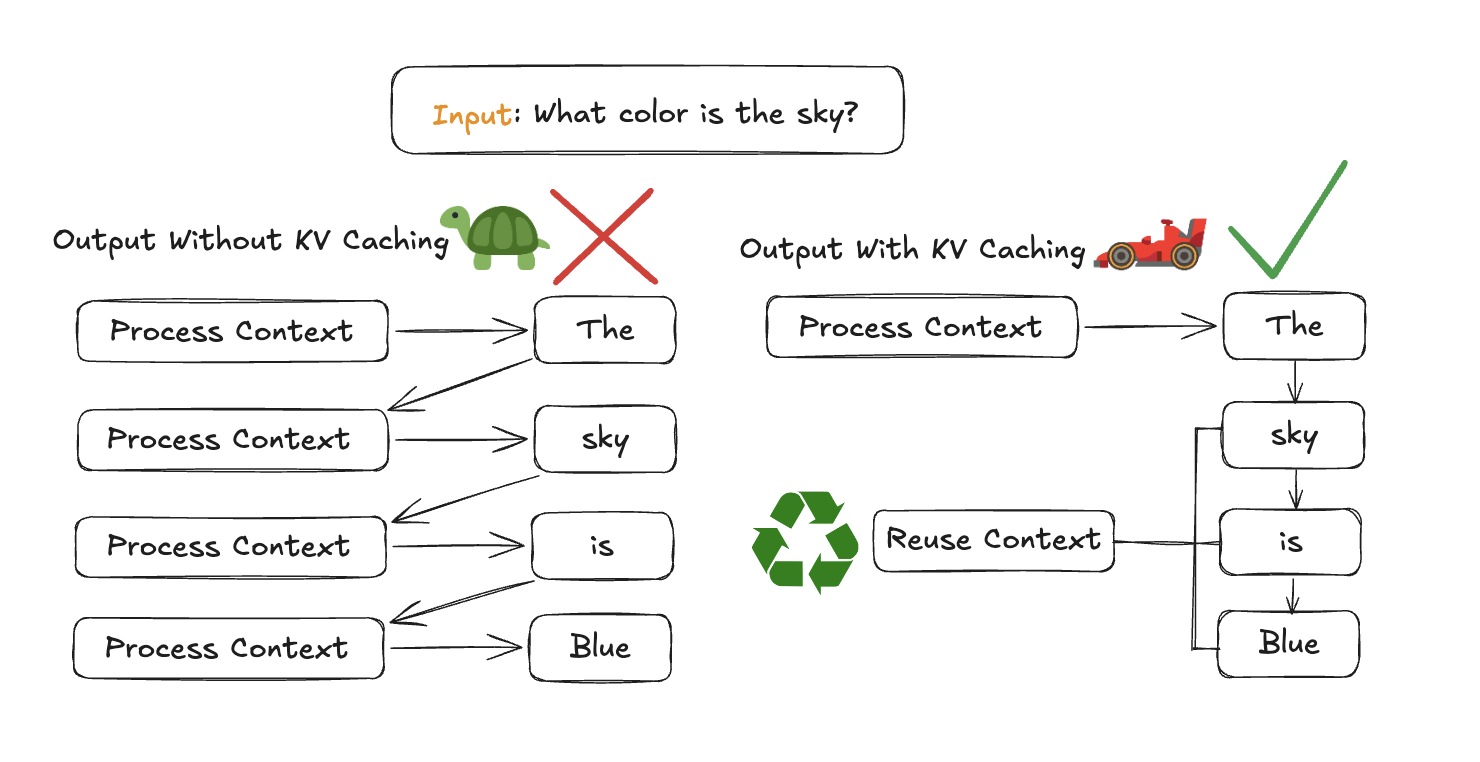

Clean Up LMCache Engine:

In [ ]:
%%bash
pkill -f "vllm.serve" || true

> 📌 During inference, LMCache will automatically handle storing and managing KV cache in CPU memory. You can monitor this through the logs, which will show messages like:
>
> ```python
> LMCache INFO: Storing KV cache for 6006 out of 6006 tokens for request 0
> ```

This means KV cache was successfully offloaded to CPU memory.

Note


*   Adjust gpu_memory_utilization based on your GPU's available memory
*   The CPU offloading buffer size can be adjusted through `LMCACHE_MAX_LOCAL_CPU_SIZE`

## What Happens in Real Life Without vs. With LMCache

Without LMCache: old cache gets evicted as new queries come in.
**With LMCache: old cache is offloaded and reused.**


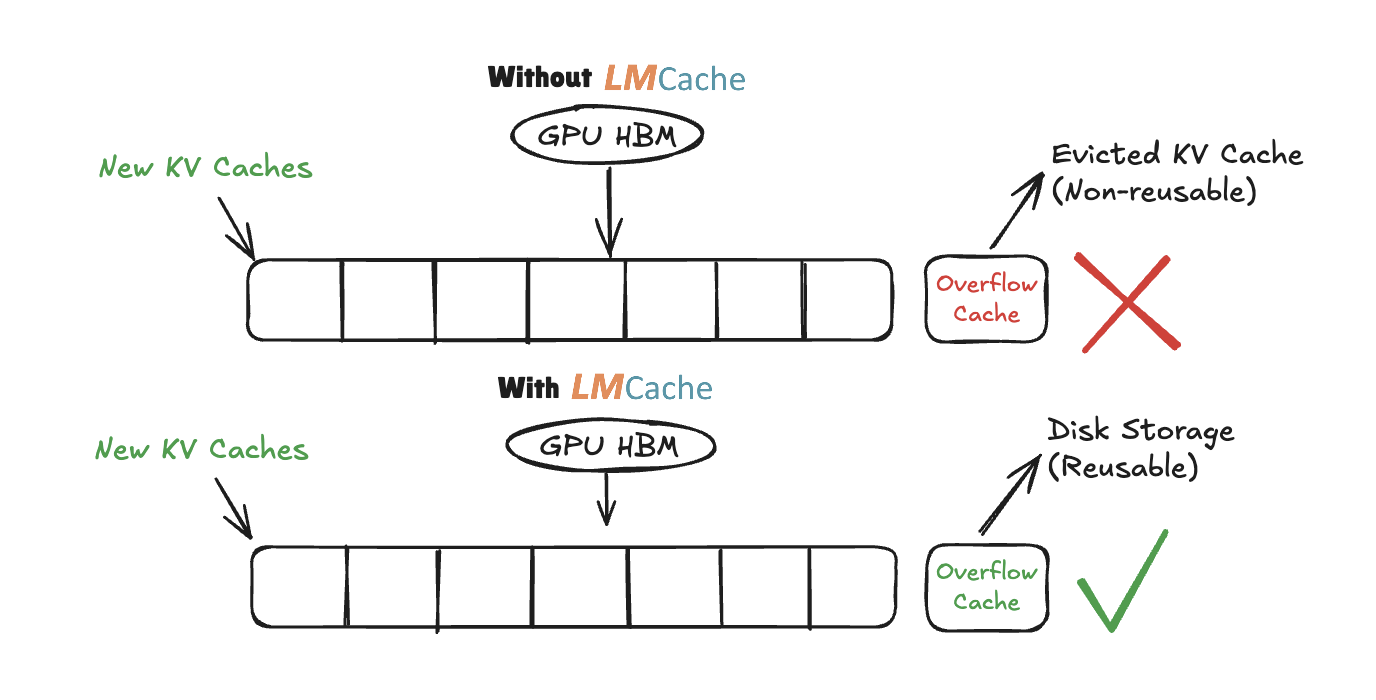